EE 502 P: Analytical Methods for Electrical Engineering
# 7. Graphs and Networks
## Prof. Eric Klavins, Electrical and Computer Engineering
### 25 September, 2019
Copyright &copy; 2019, University of Washington

**Topics**

- Definitions
  - Nodes, edges
  - Directed, undirected
  - Graphs in Python
  
- Types of graphs
  - Fully Connected
  - Tree
  - Bipartite
  - Disjoint
  
- Properties
  - Distance, radius, diameter
  - Cliques
  - Cycles
  - Planer

- Algorithms
    - Shortest path
    - Hamiltonian Paths
    
- Spectral Graph Theory

- The Page Rank Algorithm (http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html)

In [675]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

# Code for Figures

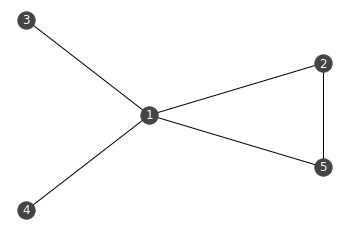

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,5)])

basic_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")

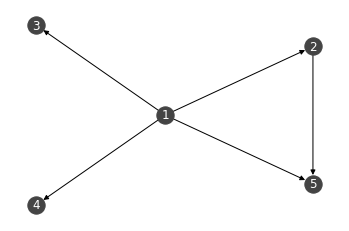

In [3]:
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,5)])

basic_digraph,ax = plt.subplots(1,1)
nx.draw(G,ax=ax,pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")

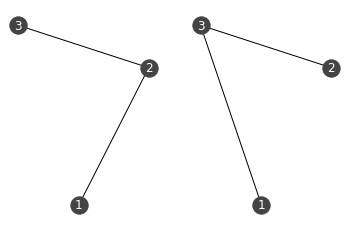

In [4]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3])
G1.add_edges_from([(1,2),(2,3)])

G2 = nx.Graph()
G2.add_nodes_from([1,2,3])
G2.add_edges_from([(1,3),(3,2)])

iso_graphs,ax = plt.subplots(1,2)
nx.draw(G1, ax=ax[0],pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")
nx.draw(G2, ax=ax[1],pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")

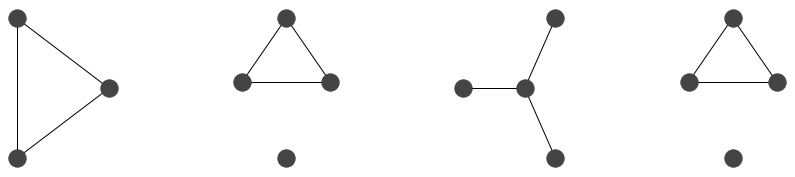

In [5]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3])
G1.add_edges_from([(1,2),(2,3),(3,1)])

G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4])
G2.add_edges_from([(1,2),(2,3),(3,1)])

G3 = nx.Graph()
G3.add_nodes_from([1,2,3,4])
G3.add_edges_from([(1,2),(1,3),(1,4)])

G4 = nx.Graph()
G4.add_nodes_from([1,2,3,4])
G4.add_edges_from([(1,2),(2,3),(3,1)])

size3_graphs,ax = plt.subplots(1,4,figsize=(14,3))
plt.subplots_adjust(wspace=1)
for i,G in enumerate([G1,G2,G3,G4]):
    nx.draw(G, 
            ax=ax[i],
            pos=nx.kamada_kawai_layout(G), 
            node_color='#444444',
            font_color="white")


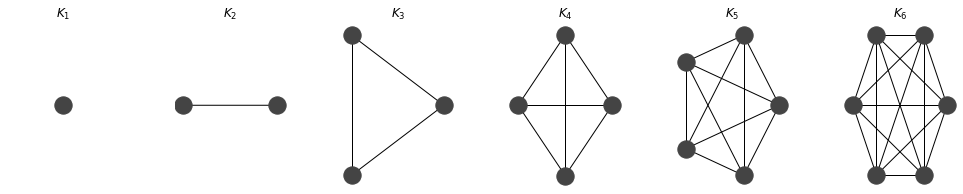

In [6]:
complete_graphs,ax = plt.subplots(1,6,figsize=(17,3))
plt.subplots_adjust(wspace=0.5)
for i in range(6):
    G = nx.complete_graph(i+1)
    ax[i].set_title("$K_%d$" % (i+1))
    nx.draw(G, 
            ax=ax[i],
            pos=nx.kamada_kawai_layout(G), 
            node_color='#444444',
            font_color="white")

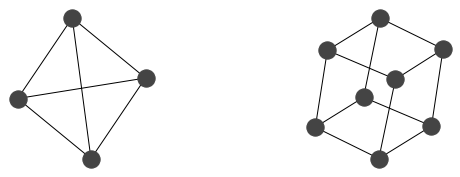

In [7]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4])
G1.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)])

G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4,5,6,7,8])
G2.add_edges_from([
    (1,2),(2,3),(3,4),(4,1),
    (5,6),(6,7),(7,8),(8,5),
    (1,5),(2,6),(3,7),(4,8)
])

cube_graphs,ax = plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=1)
for i,G in enumerate([G1,G2]):
    nx.draw(G, 
            ax=ax[i],
            node_color='#444444',
            font_color="white")


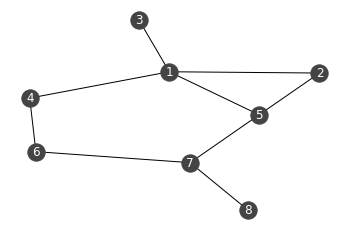

In [8]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,5),(4,6),(6,7),(7,8),(5,7)])

bigger_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")

/anaconda/lib/python3.6/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


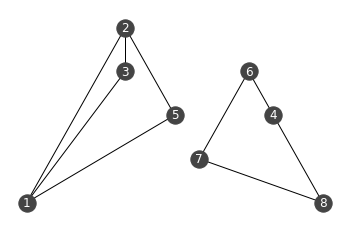

In [9]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(1,3),(1,5),(2,5),(4,6),(6,7),(7,8),(4,8),(2,3)])

two_component_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.planar_layout(G),with_labels=True, node_color='#444444',font_color="white")

/anaconda/lib/python3.6/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


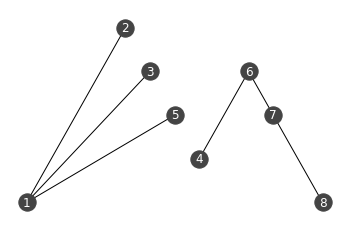

In [10]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(1,3),(1,5),(4,6),(6,7),(7,8)])

forest_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.planar_layout(G),with_labels=True, node_color='#444444',font_color="white")

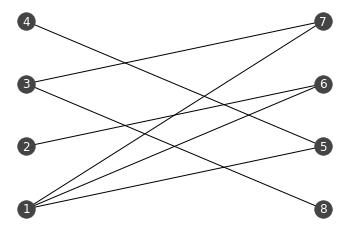

In [11]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,5),(1,6),(1,7),(2,6),(3,7),(3,8),(4,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,2,3,4]),with_labels=True, node_color='#444444',font_color="white")

In [12]:
nx.bipartite_layout(G,[1,2,3,4])

{1: array([-1.  , -0.75]),
 2: array([-1.  , -0.25]),
 3: array([-1.  ,  0.25]),
 4: array([-1.  ,  0.75]),
 5: array([ 1.  , -0.25]),
 6: array([1.  , 0.25]),
 7: array([1.  , 0.75]),
 8: array([ 1.  , -0.75])}

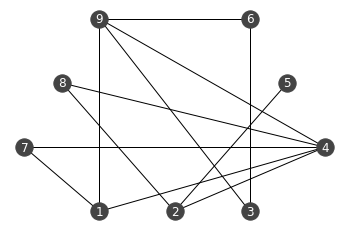

In [13]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])
G.add_edges_from([(1,4),(2,5),(3,6),(4,7),(4,8),(6,9),(7,1),(8,2),(9,3),(2,4),(4,9),(9,1)])

threepartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos={
  1: [-1,0],
  2: [0,0],
  3: [1,0],
  4: [2,1],
  5: [1.5,2],
  6: [1,3],
  7: [-2,1],
  8: [-1.5,2],
  9: [-1,3]     
}, with_labels=True, node_color='#444444',font_color="white")

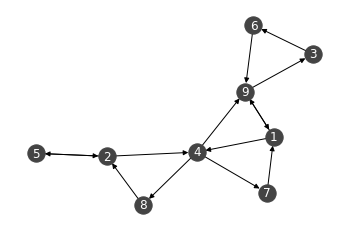

In [14]:
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])
G.add_edges_from([
    (1,4),(2,5),(3,6),(4,7),(4,8),
    (6,9),(7,1),(8,2),(9,3),(2,4),
    (4,9),(9,1),(1,9),(5,2)])

directed_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G), with_labels=True, node_color='#444444',font_color="white")

# Introduction

A graph or network is a very simple concept. It is a set of nodes and a set of edges connecting the nodes. Here are a few examples:

- The nodes are cities. There is an edge between two nodes if there is a daily flight between the nodes. The edge might also be labeled by how long the flight is.

<img src="https://www.researchgate.net/publication/329540230/figure/fig3/AS:731591391330315@1551436388075/Global-flight-network-in-2015-by-distance-band-Initially-all-electric-aircraft.png" width="75%">

- The nodes are intersections in a city and the edges are the streets. 

<img src="https://media.springernature.com/original/springer-static/image/art%3A10.1007%2Fs11067-018-9427-9/MediaObjects/11067_2018_9427_Fig1_HTML.png" width="75%">

- The nodes are computers and routers on the Internet. There is an edge from a computer to a router if they are on the same Ethernet. 

<img src="http://cheswick.com/ches/map/gallery/isp-ss.gif" width="75%">

- The nodes are web pages. There is an edge from one page to another if the first contains a link to the second.

<img src="https://www.researchgate.net/profile/Dengyong_Zhou/publication/215991352/figure/fig1/AS:305987358609423@1449964479874/The-World-Wide-Web-can-be-thought-of-as-a-directed-graph-in-which-the-vertices-represent.png" width="50%">

- The nodes are people. There is an edge between two people if they are friends. 

<img src="https://www.macalester.edu/~abeverid/images/got-network.png" width="75%">

- The nodes are neurons in a brain. There is a link from one neuron to another if there is a synaptic connection between the two neurons. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Cajal_actx_inter.jpg/300px-Cajal_actx_inter.jpg" width="75%">

- The nodes are artificial neurons in a deep neural network. 

<img src="https://orbograph.com/wp-content/uploads/2019/01/DeepLearn.png" width="75%">

- A finite state machine is an example of a labeled graph. 

<img src="https://miro.medium.com/max/822/1*_QivJY19d1Se_4iUuQ2z2g.gif" width="50%">


The sorts of questions you might have about these networks are

- What is the shortest path or distance from node A to node B?
- Is there a path that visits every node just once?
- Which nodes are the best connected?
- Are there cycles? How many?
- Is there a non-cyclic subgraph (e.g. a spanning tree?)
- Is every node connected to every other node?
- What are the farthest two nodes? The closest?
- Does the graph have a regular structure (bipartite, tree-like, cyclic, cubical, ...)?

# Basic Graph Theory

## Definitions

**Def:** An **graph** is a pair $G = (V,E)$ where $V$ is a finite or countable set and $E \subseteq V \times V$. $G$ is considered **undirected** if the pairs $(u,v)$ are considered unordered. Otherwise, $G$ is considered a directed graph. Elements in $V$ are called **nodes** or **vertices** and elements in $E$ are called **edges** or **arcs**.

If $(x,y) \in E$, we may write $xy \in E$ or even $xy \in G$. If $G$ is undirected, then $xy = yx$. In either case, we write that $x$ is adjacent to $y$. 

Graphs are visualized by drawing the nodes in $V$ as points and drawing a line from one node to another if the two nodes are adjacent according to $E$. 

**Example:** Let 

$$
V = \{ 1,2,3,4,5 \}
$$

and 

$$
E = \{ (1,2),(1,3),(1,4),(1,5),(2,5) \}. 
$$

Then $G=(V,E)$ is a graph with five nodes and five edges. It can be visualized as follows.

{{basic_graph}}

Here, we have used the `networkx` library, which is described later.

If the graph is considered directed, then instead of a simple line, we draw an arrow from the **source** vertex to the **destination** vertex, as follows.

**Example:** Suppose the graph in the previous example is considered to be directed. Then we visualize it as follows:

{{basic_digraph}}

## Isomorphism

**Def:** The **order** of the graph $G=(V,E)$ is the number of nodes in $V$. The **size** of the graph is the number of edges in $E$. 

The order of a graph is at least $0$ and at most $n(n-1)/2$. 

**Def:** Two graphs $G_1 = (V_1,E_1)$ and $G_2 = (V_2,E_2)$ are **isomorphic** if there exists a bijection $f: V_1 \rightarrow V_2$ such that 

$$
xy \in G_1 \Leftrightarrow xy \in G_2
$$

When $G_1$ is isomorphic to $G_2$, we write $G_1 \equiv G_2$.

Isomorphism is an equivalence relation on graphs. In fact, we typically do not distinguish between isomorphic graphs. 

**Example:** The following graphs 

{{iso_graphs}}

are isomorphic with 

\begin{eqnarray}
f(1) & = & 1 \\
f(2) & = & 3 \\
f(3) & = & 2
\end{eqnarray}

since 

\begin{eqnarray}
11 \in G_1 & \;\mathrm{and}\; & f(1)f(1) = 11 \in G_2 \\
12 \in G_1 & \;\mathrm{and}\; & f(1)f(2) = 13 \in G_2 \\
23 \in G_1 & \;\mathrm{and}\; & f(2)f(3) = 32 \in G_2 
\end{eqnarray}

**Example:** Here are all graphs that have order at most 4 and size 3, up to isomorphism.

{{size3_graphs}}

## Complete and Empty Graphs

**Def:** The **complete graph** on $n$ vertices has $n(n-1)/2$ edges and is denoted $K_n$. 

**Example:** Here are the complete graphs with sizes 1 through 6.

{{complete_graphs}}

**Def:** The **compliment** of a graph $G=(V,E)$ is the graph $\overline{G} = (V, V \times V - E)$. Said differently, an edge $xy$ is in $\overline{G}$ if and only if it is not in $G$. 

**Def:** The **empty graph** with $n$ edges is the graph $\overline{K_n} = (\{1,...,n\}, \emptyset)$. 

## Neighborhoods

**Def:** 
0. The set of vertices adjacent to a vertex $x \in G$ is called the **neighborhood** of $x$ and is denoted $\Gamma(x)$.
0. The relation $\sim$ is is used to say that $x$ **is adjacent to** $y$ and in $x \sim y$.
0. The **degree** of a vertex $x$ is $|\Gamma(x)|$ and is denoted $d(x)$.
0. The minimal degree over all vertices in an graph $G$ is denoted $\delta(G)$ and the maximal degree is denoted $\Delta(G)$.
0. If $\Gamma(x) = \emptyset$ then $x$ is said to be **isolated**. 
0. A graph is **$k$-regular** if $\delta(G) = \Delta(G) = k$. 
0. A graph is **regular** if it is $k$-regular for some $k$. 
0. A graph is **cubic** if it is 3-regular. 

**Example:** Consider the following graph $G$. 

{{basic_graph}}

Then

$$
\Gamma(1) = \{ 2, 3, 4, 5\} 
$$

while 

$$
\Gamma(2) = \{ 1,5 \}
$$

The minimal degree is $\delta(G) = 1$ and the maximal degree is $\Delta(G) = 4$. 

**Example:** The following graphs are 3-regular. 

{{cube_graphs}}

Each edge in a graph $G=(V,E)$ contributes one to the degree of each node it connects. Thus,

$$
\sum_{x \in V} d(x) = 2 \; |E|.
$$

Therefore, 

**Theorem:** The sum of the degrees over all nodes in a graph is twice the size of the graph. 

## Paths

**Def:** 

0. A **path** in a graph $G=(V,E)$ is a set 
$$
P = \{ x_0, x_1, ..., x_L \}
$$
where $x_{i,i+1} \in E$ for $i=0$ to $L-1$. Note that because we have required that $P$ is a set, all of the elements in $P$ are distinct. $x_0$ and $x_L$ are called the **end vertices**. 
0. Two paths $P_1$ and $P_2$ from $x$ to $y$ are **independent** if $P_1 \cap P_2 = \{x, y\}$.
0. A **walk** $W$ is a sequence of alternating vertices and edges of the form
$$
x_0, e_1, x_1, e_2, ... e_L x_L
$$
where $e_i = x_{i-1}x_i$ for $0 < i < L$. There is no requirement that the $x_i$ are unique in a walk.
0. A **circuit** is a walk where $x_0 = x_L$. 
0. A **cycle** is a circuit where all the vertices except $x_0$ and $x_L$ are distinct.

**Example:** Consider the graph below.

{{bigger_graph}}

Then

0. $P = \{1,2,5,7\}$ is an example path.
0. $W = 3, 31, 1, 15, 5, 57, 7, 76, 6$ is an example walk.
0. $W = 1, 12, 2, 25, 5, 51, 1, 14, 4, 46, 6, 67, 7, 75, 5, 51, 1$ is an example circuit. 
0. $C = 1, 15, 5, 52, 2, 21, 1$ is an example cycle.

**Theorem:** The edge set of a graph can be partitioned into cycles if and only if every vertex has even degree. 

**Proof:** Assume that the graph can be partitioned into cycles and consider an arbitrary vertex. It is part of $k$ cycles, so its degree is $2k$.

Now assume every vertex in a graph $G = (V,E)$ has even degree. Our goal is to come up with an algorithm for removingedge-disjoint cycles from $G$ one at a time. To find the first cycle, suppose 

$$
P = \{ x_0, ..., x_L \}
$$

is a path of maximal length. Since $x_0x_1 \in E$ and the degree of $x_0$ is even, it must be that $d(x_0) \geq 2$. Then $x_0$ has another neighbor, call it $y$. If $y$ is not in $P$, then $P$ was not a maximal path. Thus, $y \in $P and we can construct a cycle going through $yx_1$. 

Now remove all edges in this cycle from the graph to get a new graph $G'$. Every vertex in $G'$ has even degree as well, because we have taken exactly two edges away from each vertex in the cycle we found. Now the process can be continued (unless $G'$ i=has no edges, in which case we are done). 

## More Definitions

**Def:**

0. A graph is **connected** if every pair of vertices $x$, $y$, there is a path from $x$ to $y$. 
0. The graph $G' = (V',E')$ is a **subgraph** of $G$ if $V' \subseteq V$ and for all $x,y \in V'$, if $xy \in E'$ then $xy \in E$. 
0. A maximally connected subgraph of a graph $G$ is called a **component** component of $G$. There are no edges between any vertices from different components of a graph.
0. A graph without any cycles is called a **forest**.
0. A connected, acyclic graph is called a **tree**.
0. Let $G = (V,E)$ and $V = V_1 \cup V_2$ with $V_1 \cap V_2 = \emptyset$. If every edge joins a vertex from $V_1$ to a vertex in $V_2$, then $G$ is **bipartite**. 
0. Similarly, you can have an $r$-partite graph. 

**Example:** A graph with two components. 

{{two_component_graph}}

**Example:** A forest with two components, each of which is a tree. 

{{forest_graph}}

**Example:** A bipartite graph.

{{bipartite_graph}}

**Example:** A tripartite graph. 

{{threepartite_graph}}

## Directed Graphs

Recall that a directed graph has ordered pairs for edges, so $xy \neq yx$. 

**Def:** 

0. The **degree** of a vertex $x$ is the number of vertices $y$ for which $xy$ or $yx$ is an edge. 
0. The **in degree** $\delta^{-}(x)$ of a vertex $x$ is the number of vetrices $y$ for which $yx$ is an edge. The **out degree** $\delta^{+}(x)$ of a vertex $x$ is the number of vetrices $y$ for which $xy$ is an edge. 
0. **Note:** $d(x) = d^-(x) + d^+(x)$. 
0. Paths, walks, and cycles in directed graphs have to respect the direction of the edges. 

**Example**: The in degree of node $9$ is $\delta^-(9) = 3$ and the out degree is $\delta^+(9) = 2$. Note that both $91$ and $19$ are (distinct) edges in the graph. The `networkx` library renders such situations with a bidirectional arrow. 

{{directed_graph}}

# Algorithms

Roughly speaking, problems in Graph Theory (and in Computer Science in general) fall into two categories: Easy and hard. These statements can be made concise using the theory of *computational complexity*. 

### Algorithmic Run Time

Given an input $I$ of length $n$ to an algorithm $A$, how long does $A$ take as a function of $n$ to give an answer?

For example, suppose we have an algorithm that takes a list of $n$ numbers and returns the maximum in the list. This can be done by examining each element in the list and keeping recording the maximum it has seen so far. Thus, the algorithm runs in $n$ steps. Because there may be some step up time, etc. The actual run time might be more like $a + bn$ steps. To ignore these details and compare the main scalability issues of algorithms we our algorithm for finding the max is $O(n)$. 

Some algorithms take longer than others. For example, an (inefficient) algorithm that compares every element in a list to every other element in order to sort the list uses $O(n^2)$ steps. 

And some algorithms take a very long time. For example, suppose you would like to know if there is a path through a graph that visits every node exactly once. This is called the HAMILTONIAN PATH problem. You might just list every possible ordering of nodes and for each ordering, check to see if sequential nodes in the ordering are connected by an edge. Since there are $n$ nodes and $n!$ orderings of them, this algorithm runs in $O(n!)$ time. 

With this in mind, we say that an algorithm is **polynomial time** if it is $O(n^k)$ for some constant $k$. Our naive sorting algorithm is polynomial time. We say algorithm's running time is **exponential** if it is $O(a^n)$ for some constant $a$ or even if it is $O(n^n$). Our path finding algorithm is $O(n!)$ which turns out to be greater than $O(a^n)$ but less than $O(n^n)$, so it is considered exponential. 

### Complexity Classes

Instead of algorithms, we can also discuss the problems those algorithms solve. For example, we can call the problem of finding a maximum in a list MAXLIST, and of sorting a list SORTLIST. Then we can ask:

> What is the run time of the best algorithm that solves the given problem?

This doesn't say what they algorithm is, but does tell you if you are wasting your time trying to find a polynomial algorithm a problem P if it is strongly suspected that the best you can do is exponential for P. Complexity theorists have identified two important classes of problems.

**P:** The set of problems for which there exist polynomial algorithms to solve them.

**NP:** The set of problems for which there exist polynomial time algorithms that check potential solutions to the problem. 

For example, we know $$\mathrm{MAX} \in \mathbf{P}$$ since we have an algorithm showing so. 

And we know $$\mathrm{HAMILTONIAN\;PATH} \in \mathbf{NP}$$ since if we are given a path, we can quickly check that all the approriate edges exist.

**Problem:** Is $\mathbf{P} = \mathbf{NP}$?

The answer to this question is currently unknown. Most people think they are not the same set. Certainly it is know that $\mathbf{P} \subseteq \mathbf{NP}$. To attempt to answer the question the other way around, computer scientists have identified a set of problems that are exemplars of the class **NP**:

**NP-Complete:** A problem is NP-Complete if every other problem in NP can be "reduced" to it in polynomial time. Thus, if you can find a solution to an NP complete problem that is polynomial, you can find a solution to any other NP problem. 

Here is the situation:

<img src="https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/kzoek4blysku6u73ypyx.png" width="50%">

Proving that a problem is NP-Complete turns out to be fairly easy, although it is beyond the scope of this class. For now, you should just know that if it has been shown that a problem is NP Complete, that probably the best you can really do is either

a) Exhaustively search for solutions or
b) Find an approximate solution.

### Graph Problems

Here are a few graph problems and their complexity classes. 

In **P** (Easy):

- **SPANNING TREE:** Find a sub-graph of a given graph that contains all the nodes and is a tree. If the graph is weighted, find the minimal (or maximal) weight spanning tree. This problem is in
- **SHORTEST PATH**: Given a graph and two nodes in it, find the shortest path connecting the two nodes. You can also find the shortest paths for all pairs in polynomial time.
- **PLANARITY**: Can the nodes be laid out in 2D such that they edges can be drawn with no overlaps? 

**NP-Complete** (Hard):

- **HAMILTONIAN PATH**: Does there exist a path through a given graph that visits every node exactly once? If you add a distance to each edge, then this is the **TRAVELING SALESMAN PROBLEM**. 
- **CLIQUE:** Given a graph $G$ and an integer $k$, does $G$ contain a *clique* of size $k$ or more? A clique is a completely connected sub graph. 
- **GRAPH COLORING**: Given a graph $G$ and a number $k>2$ of colors, does there exist an assignment of the $k$ colors to the nodes of $G$ such that no two adjacent nodes are the same color?

### A SHORTEST PATH Algorithm

### A SPANNING TREE Algorithm

Once again, a spanning tree of a graph $G = (V,E)$ is a sub graph of $G$ that is a tree. That is, graph $T = (V, E')$ where $E' \subseteq E$ that is connected and has no cycles.

Finding a spanning tree of a graph is a practical problem. For example, if the nodes were computers in a network, a spanning tree can be used to find a **broadcasting network**, in which a messages is sent to all the nodes in a network as efficiently as possible while avoiding routing loops. There are many other applications as well, ranging from financial network analysis to circuit design.

One way to come up with an algorithm for building a spanning tree is called Prim's Algorithm, which goes like this:

- Set $V' = \{ 0 \}$ to contain some arbitrary node. 
- Set $E' = 0$
- While $V' \neq V$
  - Choose $u \in V$ such that there is a $v \in \Gamma(u) \cap (V - V')$
  - Add $u$ to $V'$
  - Add $uv$ to $E'$
  
To see why this works, consider a proof by induction. 
- We know that initially $(V', E')$ is a tree. 
- Now suppose that at any step $(V', E'$) is a tree. Then in the algorithm $u \in V'$ and $v \in V-V'$. Such a $u$ exists, otherwise $G$ is not connected. Furthermore, there is an edge from $u to v$ in $G$. Adding this edge to the growing tree does not create a cycle, since $v$ is not in $V'$. 

In [648]:
def spanning_tree(G):
    
    # Initialize
    V = {list(G.nodes)[0]}
    E = set({})
    
    while len(V) < len(G.nodes):

        # find a node u in V that has a neighbor v in notV
        v = None
        for u in V:
            nbrs = set(G.neighbors(u)) - V
            if len(nbrs) > 0:
                L = list(nbrs)
                random.shuffle(L)
                v = L[0]
                break
        
        # If no v is found, then return an exception
        if v == None:
            raise Exception("Graph is not connected")
        
        # Add that node to V
        V.add(v)
        
        # Add the edge uv to E
        E.add((u,v))
        
    # Build the graph
    T = nx.Graph()
    T.add_nodes_from(V)
    T.add_edges_from(E)
    
    return T

Connected: yes


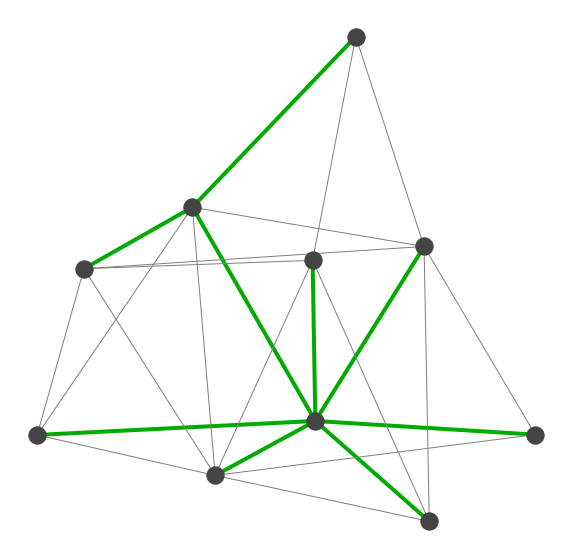

In [649]:
# Example: A random graph

G = nx.fast_gnp_random_graph(10,0.5)
print("Connected: %s" % ("yes" if nx.is_connected(G) else "no"))
T = spanning_tree(G)

fig,ax = plt.subplots(1,1,figsize=(10,10))

edge_colors = ["#00ab00" if T.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [4 if T.has_edge(u,v) else 1 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=False, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

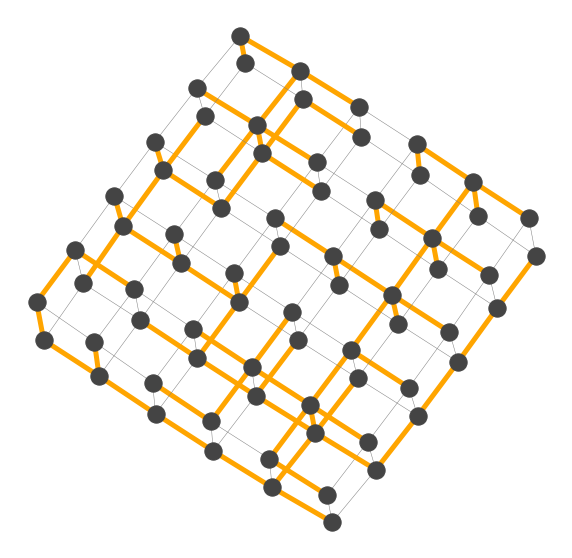

In [650]:
G = nx.grid_graph(dim=[6,6,2])
T = spanning_tree(G)

fig,ax = plt.subplots(1,1,figsize=(10,10))

edge_colors = ["orange" if T.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if T.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=False, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

### An Approximate HAMILTONIAN CIRCUIT Algorithm

1. Find a spanning tree T
2. Choose a starting node and compute the depth first search path for that node to get a cycle (with repeat edges)
3. Apply path shortening until no more nodes can be removed from the cycle

In [651]:
route = []

def DFS_aux(T,v):
    global route
    route.append(v)
    T.nodes[v]["visited"] = True
    children = [u for u in T.neighbors(v) if not T.nodes[u]["visited"]]
    for child in children:
        DFS_aux(T,child)
        route.append(v)

def DFS(T):
    global route
    route = []
    for v in T.nodes:
        T.nodes[v]["visited"] = False;
    v = list(T.nodes)[0]
    DFS_aux(T,v)
    return route

def shorten_by_one(G,route):
    # print(route)
    repeats = [v for v in route[1:-1] if route.count(v) > 1]
    random.shuffle(repeats) # avoids always picking 0
    for r in repeats:
        for i,v in enumerate(route):
            if route[i] == r and i != 0 and i != len(route) - 1:
                x,y = route[i-1], route[i+1]
                if G.has_edge(x,y):
                    # print("removing %d at index %d" % (r,i))
                    return route[0:i] + route[i+1:]
    return route

def shorten(G,route):
    new_route = shorten_by_one(G,route)
    while len(new_route) < len(route):
        route = new_route
        new_route = shorten_by_one(G,route)
    return new_route

def route_graph(route):
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R

In [652]:
n = 20
G = nx.fast_gnp_random_graph(n,0.65)

Route has length 23


[0, 15, 0, 14, 19, 13, 0, 18, 7, 12, 17, 6, 11, 16, 5, 4, 9, 3, 8, 1, 10, 1, 2
, 0]

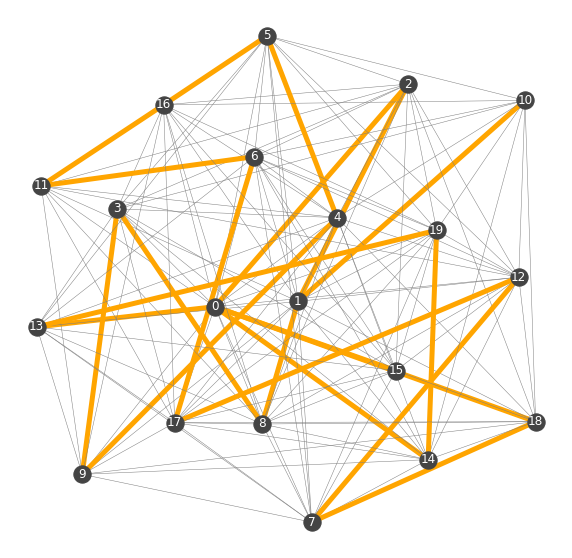

In [653]:
T = spanning_tree(G)
route = shorten(G,DFS(T))
R = route_graph(route)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if R.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if R.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

print("Route has length %d" % (len(route)-1))
route

In [654]:
def legal_route(G,route):
    for i in range(len(route)-1):
        if not G.has_edge(route[i], route[i+1]):
            return False
    return True

def guess_and_check(G,iterations):
    for i in range(iterations):
        route = list(np.random.permutation(len(G.nodes)))
        route = route + [ route[0] ]
        if legal_route(G,route):
            print("Found a route after %d guesses" % i)
            return route
    print("No route found")
    return None

In [655]:
print("There are %d possible routes" % math.factorial(len(G.nodes)))
route = guess_and_check(G,50000)
route

There are 2432902008176640000 possible routes
Found a route after 607 guesses


[12, 4, 14, 18, 10, 16, 1, 6, 11, 9, 7, 5, 19, 0, 13, 3, 17, 8, 15, 2, 12]

Route has length 20


[12, 4, 14, 18, 10, 16, 1, 6, 11, 9, 7, 5, 19, 0, 13, 3, 17, 8, 15, 2, 12]

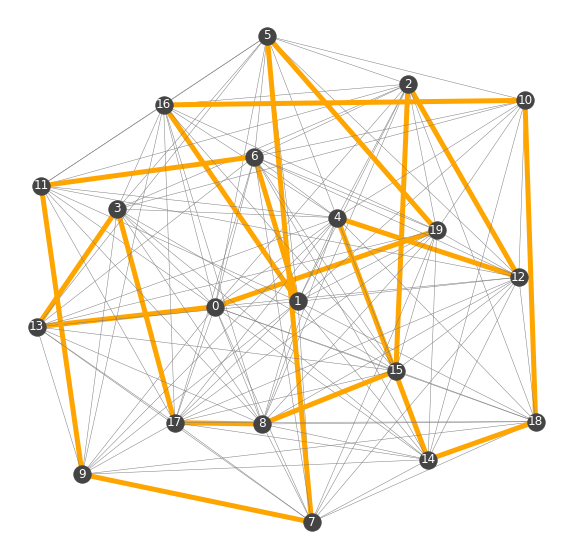

In [656]:
R = route_graph(route)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if R.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if R.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

print("Route has length %d" % (len(route)-1))
route

# Spectral Graph Theory

Graphs can be represented as matrices in a variety of ways, and the properties of those matrices can tell you something about the graph.

**Def:** Given a graph $G = (V,E)$ with $|V| = n$ the **adjacency matrix** of $G$ is the matrix $a \in \mathbb{R}^{n \times n}$ defined by 

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} \; (i,j) \in E \\
0 & \mathrm{else}  
\end{array}
\right .
$$

**Example:** The graph below has adjacency matrix

$$
A = \begin{pmatrix}
0 & 1 & 1 & 1 & 1 \\
1 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0
\end{pmatrix} .
$$

{{basic_graph}}

**Def:** Let $D$ be the **degree matrix**, defined to be the diagonal matrix where $D_{i,i} = d(i)$. Then the **Laplacian** matrix is defined to be

$$
L = D - A.
$$

**Example:** The Laplacian for the graph above is

$$
L = \begin{pmatrix}
4 & -1 & -1 & -1 & -1 \\
-1 & 2 & 0 & 0 & -1 \\
-1 & 0 & 1 & 0 & 0 \\
-1 & 0 & 0 & 1 & 0 \\
-1 & -1 & 0 & 0 & 2
\end{pmatrix} .
$$

**Zero eigenvalues of the Laplacian:**
- Each row sums to 0
- Each column sums to 0
- The vector
$$
\mathbf{1} = \begin{pmatrix}
1 \\
1 \\
\vdots  \\
1
\end{pmatrix}
$$
is an eigenvector of $L$ with eigenvalue 0.
- The number of zero eigenvalues of $L$ equals the number of connected components of $G$. This can be seen by reordering the nodes so that $L$ becomes block diagonal. 

Additionally, it turns out that the eigenvalues of $L$ are greater than zero. To see why, first note a definition.

**Def:** A square, symmetric matrix $M$ is **positive definite** if $x^T M x > 0$ for all $x \neq 0$. It is **positive semi-definite** if $x^T M x \geq 0$. 

**Theorem:** The eigenvalues of a symmetric matrix are real. 

**Proof:** Say $M = M^T$ and $\lambda$ is an eigenvalue of $M$ with a (possibly complex) eigenvector $v$. Thus $M v = \lambda v$. If $\lambda$ is complex then $\overline{\lambda}$ is also an eigenvalue of $M$ with $M \overline{v} = \overline{\lambda} \overline{v}$. Then

$$
\overline{v}^T M v = \overline{v}^T \lambda v = \lambda \overline{v}^Tv 
$$

and since $M = M^T$,

$$
\overline{v}^T M v = (M \overline{v})^T v = (\lambda \overline{v})^Tv = \overline{\lambda} \overline{v}^T v.
$$

Note that since $v \neq 0$, $\lambda = \overline{\lambda}$ so $\lambda is real. 

**Theorem:** The eigenvalues of a positive definite matrix are positive. The eigenvalues of a positive semi-definite matrix are non-negative.

**Proof:** Say $M$ is positive definite. Then $Mv \ \lambda v$ implies that $x^T M x$ = (M x)^T x = \lambda x^T x. Since $x^T M x > 0$, $\lambda > 0$. A similar argument for semi-definite matrices holds.

**Def:** Define $L_{ij}$ to be the Laplacian of the graph with the same nodes as $G$, but with only one edge from $i$ to $j$. Then

$$
L = \sum_{i \sim j} L_{i,j}
$$

**Theorem**: The Laplacing $L$ of a graph is positive semidefinite.

**Proof:** If $x$ is any nonzero vector, then

\begin{eqnarray}
x^T L x & = & x^T \left ( \sum_{i \sim j} L_{i,j} \right ) x \\
& = & \sum_{i \sim j} x^T L_{i,j} x \\
& = & \sum_{i \sim j} (x_i - x_j)^2 \geq 0 .
\end{eqnarray}

Thus, $L$ is positive semi-definite.

**Example:** The three node complete graph below

{{basic_graph}}

has Laplacian

$$
L = \begin{pmatrix}
1 & -1 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 0 
\end{pmatrix} + 
\begin{pmatrix}
1 & 0 & -1 \\
0 & 0 & 0 \\
-1 & 0 & 1 
\end{pmatrix} + 
\begin{pmatrix}
0 & 0 & 0 \\
0 & 1 & -1 \\
0 & -1 & 1 
\end{pmatrix} = 
\begin{pmatrix}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 
\end{pmatrix}.
$$

To see how $x^T L_{ij} x = (x_i - x_j)^2$, consider

\begin{eqnarray}
x^T L_{12} x & = & x^T
\begin{pmatrix}
1 & -1 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 0 
\end{pmatrix} x \\
& = & x_1^2 - 2 x_1 x_2 + x_2^2 \\
& = & (x_1 - x_2)^2 .
\end{eqnarray}

Since $L$ is positive semidefinite:

**Theorem:** The eigenvalues of the Laplacian are non-negative. 

In [744]:
G = nx.fast_gnp_random_graph(10,0.25)
print("%d component(s)" % nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
L

4 component(s)


matrix([[ 3, -1,  0,  0,  0,  0, -1, -1,  0,  0],
        [-1,  3,  0,  0,  0,  0, -1,  0, -1,  0],
        [ 0,  0,  1,  0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [-1, -1, -1,  0,  0,  0,  3,  0,  0,  0],
        [-1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
        [ 0, -1,  0,  0, -1,  0,  0,  0,  2,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Text(0.5, 1.0, 'Eigenvalues of Laplacian of Random Matrix')

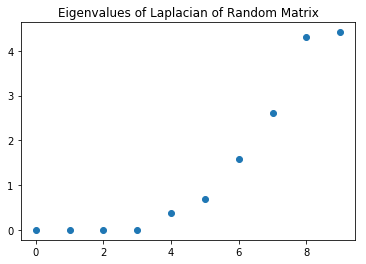

In [745]:
eigs = np.linalg.eigvals(L)
plt.plot(np.sort(eigs),'o')
plt.title("Eigenvalues of Laplacian of Random Matrix")

### Consensus

Suppose the nodes in a graph are computers linked by communication lines (the edges). And suppose each computer $i$ has a value $x_i$. How would you have the computers, in a distributed way, compute the average of all the $x_i$ values? This is called a **consensus** problem. 

One way to solve the problem is to have each robot run a differential equation

$$
\dot x_i = \sum_{j \in \Gamma(x_i)} x_j - x_j
$$

This is equivalent to writing

$$
x = -L x
$$

where $L$ is the Laplacian of the network. 

**Theorem:** $x(t)$ converges to the average $a = \sum_i x_i(0)$. 

**Proof:** Define the error $e = x - a \mathbb{1}$ and define

$$
V = ||e|| = e^T e.
$$

Note: $V$ is called a Lyapunov function. We want to show that $V$ converges to zero.

Recalling that $L \mathbb{1} = 0$, 

\begin{eqnarray}
\dot V & = & \dot e ^T e + e^T \dot e \\
& = & -(L(e+a\mathbb{1}))^T e - e L(e+a\mathbb{1}) \\
& = & -2 e^T L e \leq 0.
\end{eqnarray}

Furthermore, $\dot V = 0$ only when $e = 0$. Since, in the limit as $t \rightarrow \infty$ we have that $e = 0$, it must be that $x_i \rightarrow a$. 

In [781]:
G = nx.fast_gnp_random_graph(10,0.25)
L = nx.laplacian_matrix(G).todense()
L

matrix([[ 1,  0,  0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  2,  0, -1, -1,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0, -1,  0,  0],
        [ 0, -1,  0,  2, -1,  0,  0,  0,  0,  0],
        [ 0, -1,  0, -1,  3,  0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  2,  0, -1,  0, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [-1,  0, -1,  0, -1, -1,  0,  4,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  1]], dtype=int64)

In [782]:
def consensus(x,t):
    xdot = -np.matmul(L,x)
    return np.asarray(xdot).flatten()

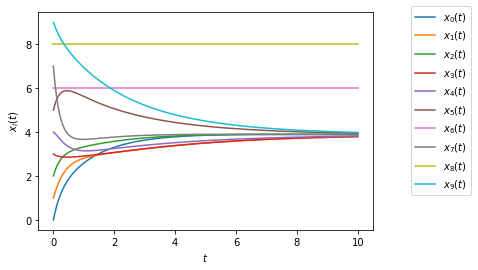

In [783]:
t = np.linspace(0., 10, 1001)
x0 = np.array(range(len(G.nodes)))
trajectory = spi.odeint(consensus,x0,t);

# Plot the components of x
for i in range(len(G.nodes)):
    plt.plot(t, trajectory[0:,i],label="$x_%d(t)$" % i);

plt.xlabel('$t$');
plt.ylabel('$x_i(t)$');
plt.legend(bbox_to_anchor=(1.1, 1.05));